## Dataset analysis

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [103]:
path = 'data/raw/train.csv'
df = pd.read_csv(path, usecols=['anchor', 'target', 'context', 'score'])
df

,anchor,target,context,score
0,abatement,abatement of pollution,A47,0.50
1,abatement,act of abating,A47,0.75
2,abatement,active catalyst,A47,0.25
3,abatement,eliminating process,A47,0.50
4,abatement,forest region,A47,0.00
...,...,...,...,...
36468,wood article,wooden article,B44,1.00
36469,wood article,wooden box,B44,0.50
36470,wood article,wooden handle,B44,0.50
36471,wood article,wooden material,B44,0.75


Statics on number of world

In [104]:
def stats_field(field):
    print('-------------------------------------------------')
    max_length = field.apply(lambda s: len(s)).max()
    min_length = field.apply(lambda s: len(s)).min()

    print(f'min:{min_length}\tmax:{max_length}')

    # sanity check
    idx_min = field.apply(lambda s: len(s)).idxmin()


    idx_max = field.apply(lambda s: len(s)).idxmax()
    print(f'min_val:{field[idx_min]}\tmin_val:{field[idx_max]}')

    max_length = field.apply(lambda s: len(s)).max()
    min_length = field.apply(lambda s: len(s)).min()

    print(f'min:{min_length}\tmax:{max_length}')
    print('-------------------------------------------------')


target = df['target'].astype(str)
stats_field(target)

df['anchor_context'] = df.apply(lambda row: row['anchor']+ ';'+ row['context'], axis=1)
a_context= df['anchor_context'].astype(str)
stats_field(a_context)




-------------------------------------------------
min:2	max:98
min_val:id	min_val:2s 6 5 3as4s6ar 2 oxo 133a466a hexahydrothieno34 dimidazol 4 ylpentanoylamino 2 azaniumylhexanoate
min:2	max:98
-------------------------------------------------
-------------------------------------------------
min:7	max:42
min_val:ack;G04	min_val:reflection type liquid crystal display;G02
min:7	max:42
-------------------------------------------------


Statistics on number of anchor

In [105]:
df_anchor = df.groupby('anchor')['context'].count()

In [106]:
tmp = df_anchor.to_dict()
data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True))

In [107]:
data

{'component composite coating': 152,
 'sheet supply roller': 150,
 'source voltage': 140,
 'perfluoroalkyl group': 136,
 'el display': 135,
 'average pore size': 133,
 'speed control means': 130,
 'parallel orientation': 127,
 'displacement mechanism': 124,
 'cathode layer': 118,
 'flow openings': 117,
 'electromagnetic radiation source': 115,
 'overall weight': 114,
 'central flow path': 111,
 'dimensional location': 109,
 'elastic assembly': 109,
 'conductor particles': 108,
 'hydrocarbyl substituted succinic': 108,
 'oxidizing enzyme': 107,
 'stabilizer members': 107,
 'nvm array': 106,
 'opposing walls': 105,
 'imaging axis': 104,
 'fluid flow source': 102,
 'produce liquid hydrocarbons': 102,
 'dual clutch': 101,
 'equipment unit': 101,
 'radio wave transmission': 101,
 'brake arms': 100,
 'coupling arms': 100,
 'materially less': 100,
 'pen based computer': 100,
 'smooth outer surface': 99,
 'return structure': 98,
 'component control': 97,
 'feed control valve': 97,
 'source cha

Text(0.5, 1.0, "Distribution of anchor's context ")

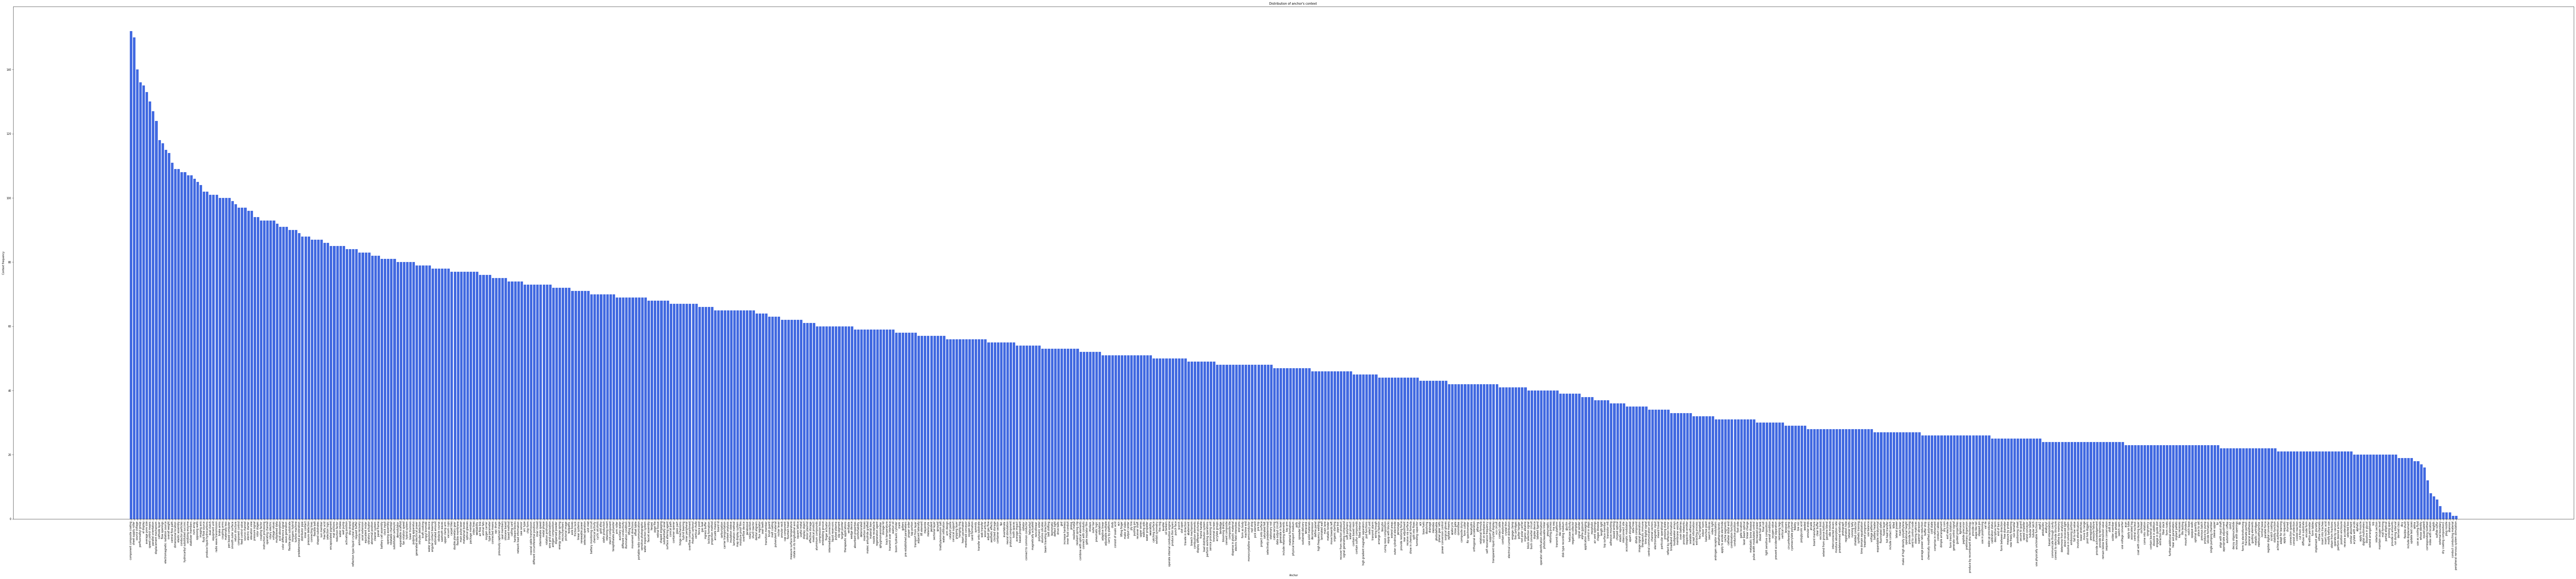

In [108]:
plt.rcParams.update({'font.size': 8})   

n = len(data.keys())
plt.figure(figsize=(n//5, 30))
plt.bar(data.keys(), data.values(), align='center', color='royalblue')
plt.xlabel('Anchor')
plt.ylabel('Context frequency')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.title('Distribution of anchor\'s context ')

In [109]:
df['anchor'].unique().shape

(733,)

Statistics on anchor given the context

In [110]:
df['context'].unique().shape

(106,)

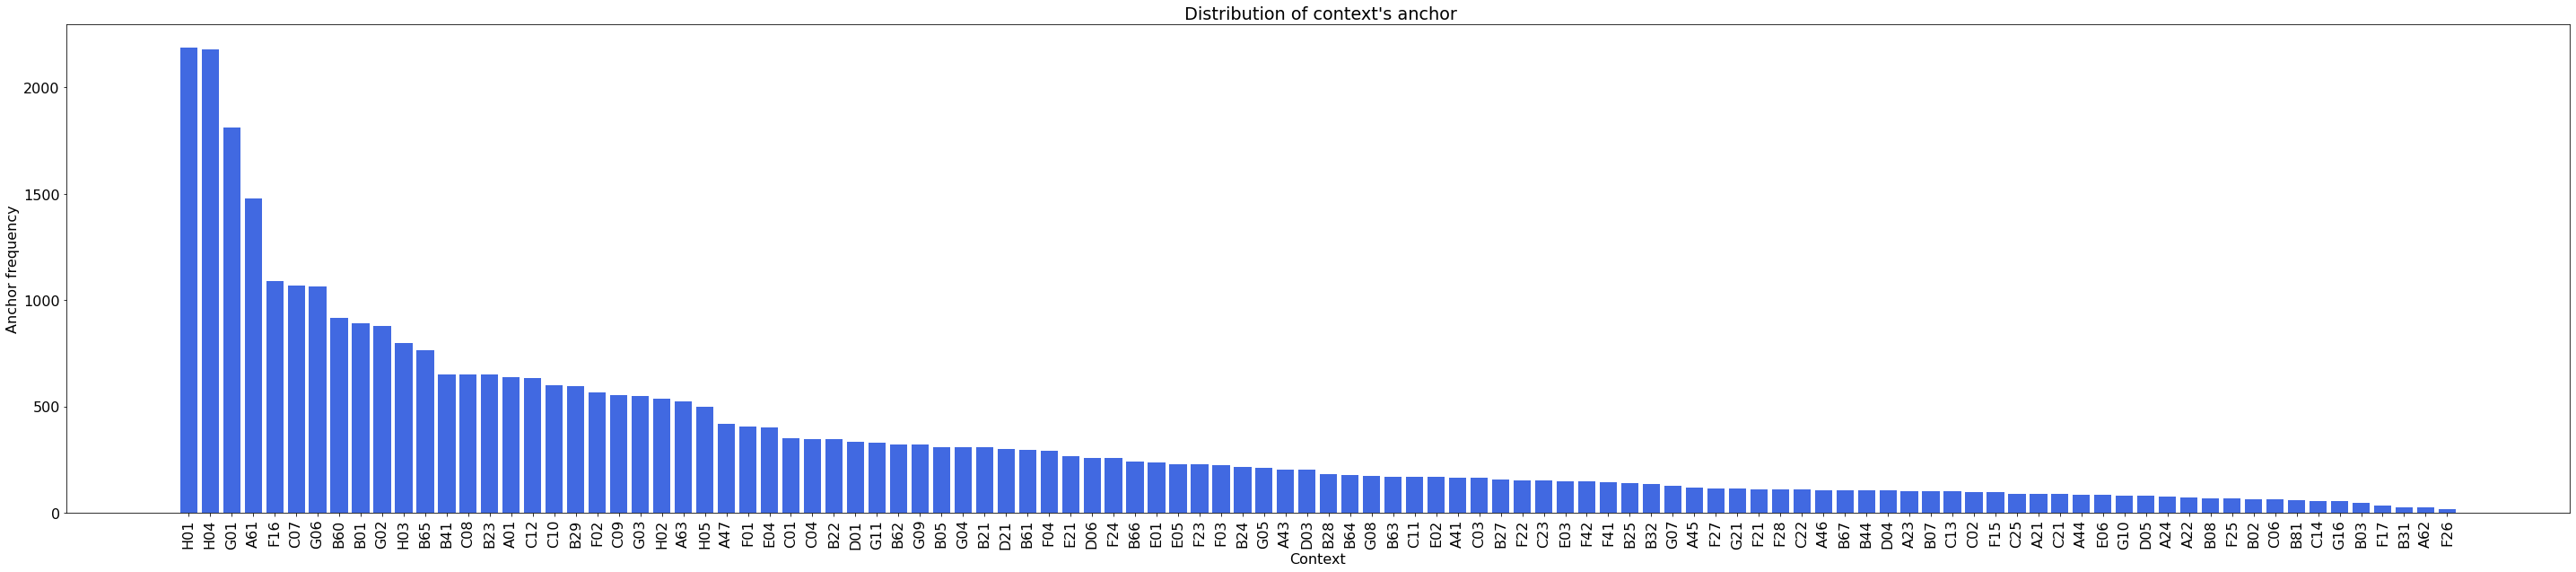

In [130]:
def plot_context_anchor_dist(df:pd.DataFrame,set_name:str='')->None:
    """ plot the context's anchor distribution given its dataframe
        df(pd.DataFrame): dataframe of set
        set_name(str)='': name of set 
    """
    df_context = df.groupby('context')['anchor'].count()
    tmp = df_context.to_dict()
    data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True))
    plt.rcParams.update({'font.size': 16})   

    n = len(data.keys())
    plt.figure(figsize=(50, 10))
    plt.bar(data.keys(), data.values(), align='center', color='royalblue')
    plt.xlabel('Context')
    plt.ylabel('Anchor frequency')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(f'{set_name} Distribution of context\'s anchor')
    
plot_context_anchor_dist(df)

In [112]:
sum( [ round(v/10,0) for v in data.values()])

3650.0

Split train into train and validation set

In [113]:
df['anchor_context'].unique().shape[0]

1699

In [114]:
df['anchor_context'].count()

36473

In [115]:
df_grouped = df.groupby('anchor_context')
df_grouped.indices

{'abatement;A47': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 'abatement;A61': array([21, 22, 23]),
 'abatement;A62': array([24]),
 'abatement;C01': array([25]),
 'abatement;F16': array([26]),
 'abatement;F24': array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45]),
 'abatement;F28': array([46]),
 'abatement;H01': array([47]),
 'abatement;H04': array([48]),
 'abnormal position;B23': array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66, 67, 68]),
 'abnormal position;B41': array([69, 70]),
 'abnormal position;D03': array([71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
        88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 'abnormal position;E03': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130]),
 'absorbent pr

In [116]:
df['val']=0
tmp =df_grouped.indices
df

,anchor,target,context,score,anchor_context,val
0,abatement,abatement of pollution,A47,0.50,abatement;A47,0
1,abatement,act of abating,A47,0.75,abatement;A47,0
2,abatement,active catalyst,A47,0.25,abatement;A47,0
3,abatement,eliminating process,A47,0.50,abatement;A47,0
4,abatement,forest region,A47,0.00,abatement;A47,0
...,...,...,...,...,...,...
36468,wood article,wooden article,B44,1.00,wood article;B44,0
36469,wood article,wooden box,B44,0.50,wood article;B44,0
36470,wood article,wooden handle,B44,0.50,wood article;B44,0
36471,wood article,wooden material,B44,0.75,wood article;B44,0


In [117]:
for a_c, indices in tmp.items():
    
    tot_idx = indices.shape[0]
    n_idx = math.ceil(tot_idx/10)
    
    range_idx = df.index.isin(indices[:n_idx])
    df.loc[(range_idx) & (df['anchor_context'] == a_c), 'val'] = 1
 

In [125]:
# inefficient storage to meet kaggle test requirement
train_df = df[ df['val']==0]
train_df.to_csv('data/processed/train.csv', columns=['anchor', 'context', 'target','score'])
val_df = df[ df['val']==1]
val_df.to_csv('data/processed/val.csv', columns=['anchor', 'context',  'target', 'score'])


In [119]:
df[df['val']==1]

,anchor,target,context,score,anchor_context,val
0,abatement,abatement of pollution,A47,0.50,abatement;A47,1
1,abatement,act of abating,A47,0.75,abatement;A47,1
2,abatement,active catalyst,A47,0.25,abatement;A47,1
21,abatement,emission abatement,A61,0.50,abatement;A61,1
24,abatement,pollution abatement,A62,0.50,abatement;A62,1
...,...,...,...,...,...,...
36419,wood article,article spinner,B05,0.00,wood article;B05,1
36445,wood article,board,B27,0.50,wood article;B27,1
36446,wood article,article generator,B44,0.00,wood article;B44,1
36447,wood article,article spinner,B44,0.00,wood article;B44,1


Show distribution of the different sets

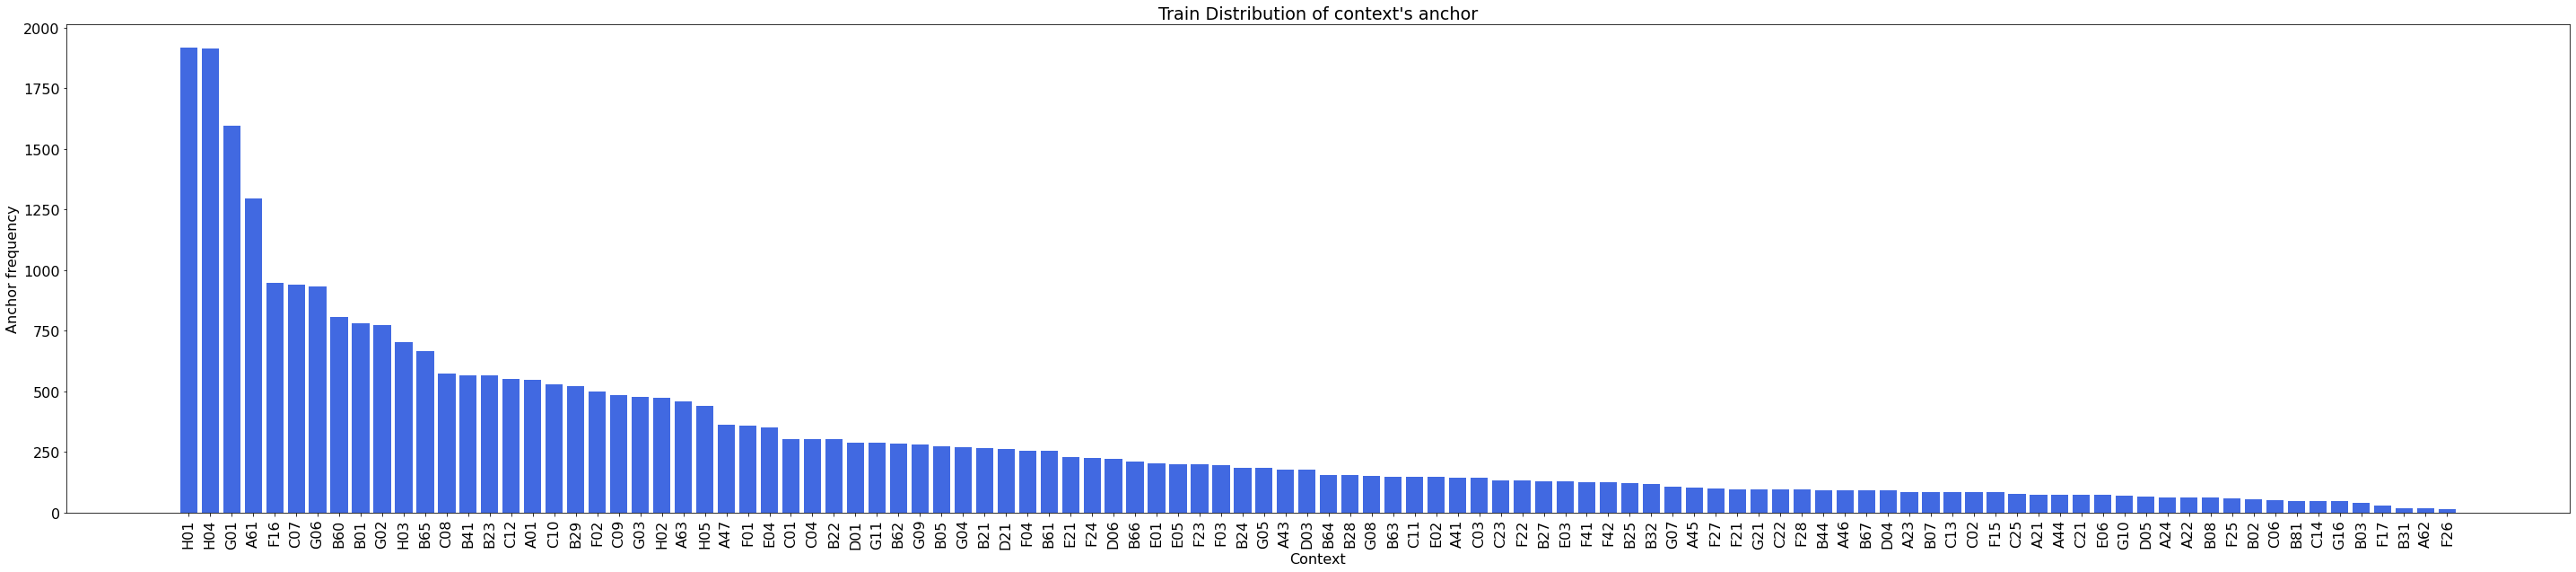

In [131]:
 plot_context_anchor_dist(train_df, 'Train')

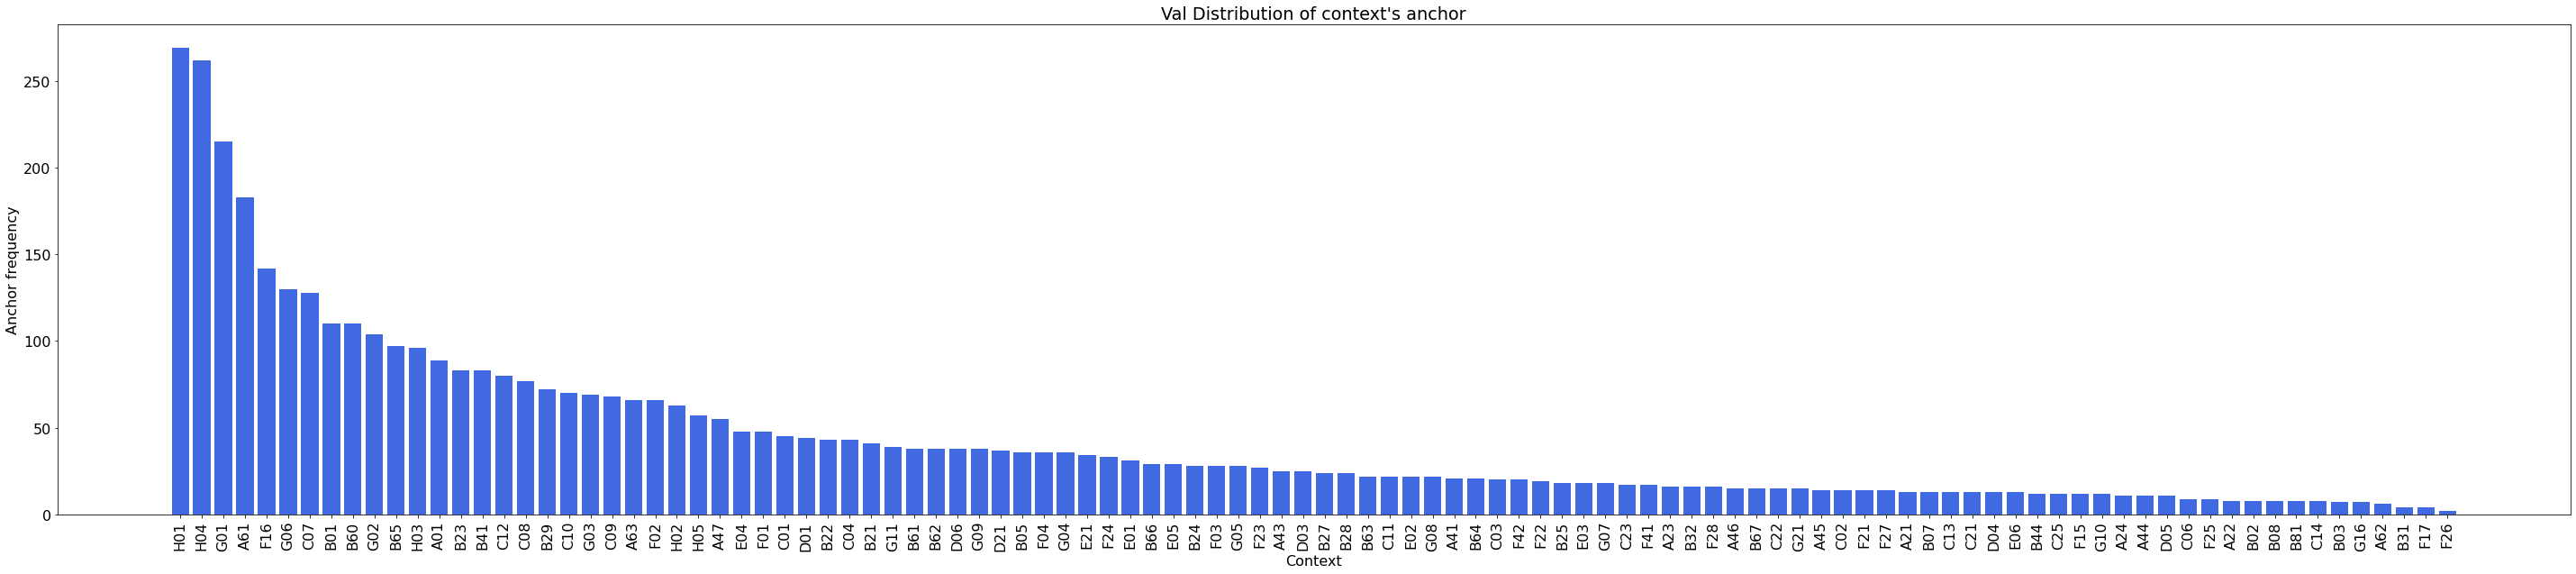

In [132]:
plot_context_anchor_dist(val_df, 'Val')